In [4]:
#| hide
from yolo_v8_segmentation.core import *
from yolo_v8_segmentation.data_preparation import *
from pathlib import Path
from fastcore.all import * 
from nbdev.showdoc import show_doc

# yolo_v8_segmentation

> segementation training and inference with yolov8 model

This file will become your README and also the index of your documentation.

## Install

```sh
pip install yolo_v8_segmentation
```

## How to use

### Visualize mask and image

In [2]:
from yolo_v8_segmentation.viz_utils import *

In [3]:
msk_path = Path(r'/home/hasan/Schreibtisch/projects/data/microscopy/patch_train_masks')
img_path = Path(r'/home/hasan/Schreibtisch/projects/data/microscopy/patch_train_images/')

In [4]:
idx = 2
image = img_path.ls()[idx]
msk = msk_path.ls()[idx]


In [5]:
show_doc(overlay_mask_border_on_image)

---

[source](https://github.com/HasanGoni/yolo_v8_segmentation/blob/main/yolo_v8_segmentation/viz_utils.py#LNone){target="_blank" style="float:right; font-size:smaller"}

### overlay_mask_border_on_image

>      overlay_mask_border_on_image (im_path, msk_path, border_color=(0, 1, 0),
>                                    border_width=1)

Overlays the border of a binary mask on a grayscale image and displays the result using matplotlib.

Args:
image (numpy.ndarray): Grayscale image.
mask (numpy.ndarray): Binary mask of the same size as the image.
border_color (tuple): RGB color for the mask border in the range [0, 1].
border_width (int): Width of the border.

Returns:
None: The function displays a plot.

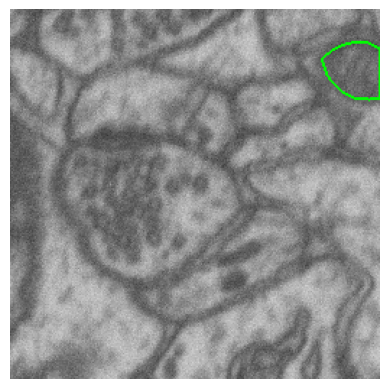

In [6]:
overlay_mask_border_on_image(im_path=image, msk_path=msk)

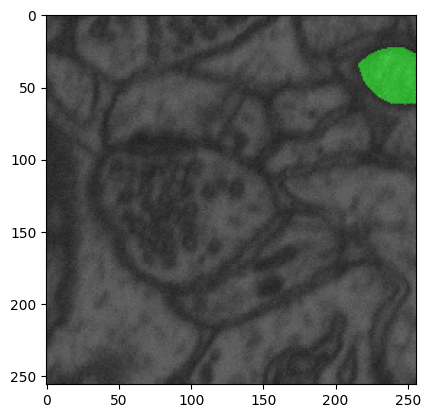

In [7]:
overlay_mask(im_path=image, msk_path=msk)   

## Yolo annotation visualization

- Upto now it is just a folder where there are some image and mask pairs. Previous method shows the masks and images
- In case data is prepared in `.txt` format for training yolo, it is important to check it whether the annotations are correct or not. This function will help to visualize the annotations on the image.


In [8]:
yolo_mask_path = Path(r'/home/hasan/Schreibtisch/projects/data/microscopy/yolo_dataset_train')
im_path = Path(r'/home/hasan/Schreibtisch/projects/data/microscopy/patch_train_images/')

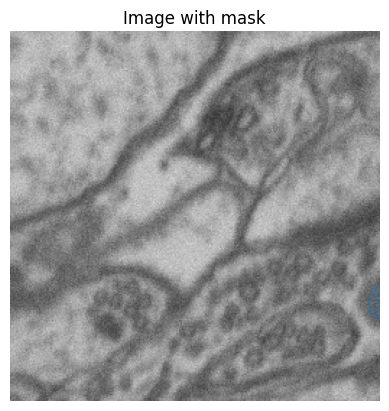

In [9]:
overlay_yolo_mask(im_path=im_path, msk_path=yolo_mask_path)

- in case specific image wanted to see, then one need to pass the image name to the function
    - here I am using im_name=None, so random image is selected

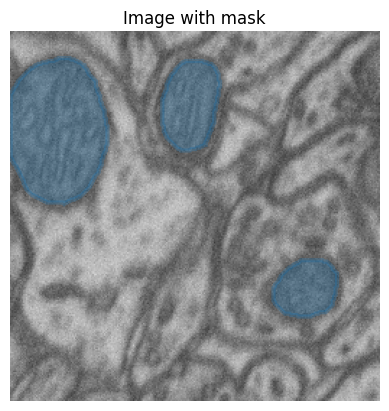

In [10]:

overlay_yolo_mask(im_path=im_path, msk_path=yolo_mask_path, im_name=None, fill=True, alpha=0.3)

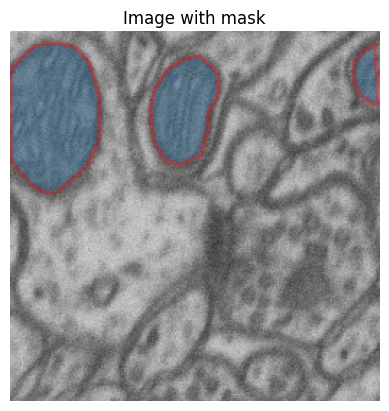

In [12]:

overlay_yolo_mask(
    im_path=im_path, 
    msk_path=yolo_mask_path, 
    im_name=None, 
    color='red',
    fill=True, 
    alpha=0.3)

## Convert label to yolo format

### First coco format json file

In [ ]:
- Normaly there are some labelling tool where you can label your images and then upload them direct in the yolo format.
- But we are supossing that, you have some binary masks and then you want to convert them to yolo format.
- First we will convert to coco format and then to yolo format.

In [5]:
# in my case I have only one class and others are background, in case of more class, one should add name and id for the masks

category_ids = {
    "object": 1,
}


In [6]:
# where masks(in my case binary masks) are stored
trn_msk_path = Path(r'/home/hasan/Schreibtisch/projects/data/microscopy/patch_train_masks')
# this will be json path for the coco format
trn_json_path = Path(r'/home/hasan/Schreibtisch/projects/data/microscopy/patch_train_masks/train.json')
process_masks(
    mask_path=trn_msk_path, 
    json_path=trn_json_path, 
    category_ids=category_ids)

  0%|          | 0/1642 [00:00<?, ?it/s]

### Now coco foramt

In [ ]:
create_yolo_dataset(
    img_path=trn_img_path,# train images path 
    output_path=trn_output_path, # output for each image normally some txt file
    json_path=trn_json_path, # json path for coco format
)

In [ ]:
# for yolo to run one needs to create a yaml file to tell where the data is situated
# coco expect following format
# train: /path/to/train/images
# label: /path/to/train/labels
# valid: /path/to/valid/images
# valid_label: /path/to/valid/labels

create_yaml(
    json_path=trn_json_path, # coco format json path
    yaml_path=f'{path}/data.yaml', # yaml path for saving
    train_path=yolo_trn_images,  # where train images are stored
    val_path=trn_img_path, # where validaiton images are stored
    )